In [ ]:
!git clone https://github.com/sherwin-roger/cellimage.git

Cloning into 'cellimage'...
remote: Enumerating objects: 27568, done.
remote: Total 27568 (delta 0), reused 0 (delta 0), pack-reused 27568
Receiving objects: 100% (27568/27568), 317.67 MiB | 45.37 MiB/s, done.
Checking out files: 100% (27559/27559), done.


In [ ]:

import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
trainDatagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
testDatagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train=trainDatagen.flow_from_directory("cellimage/cell_images/train",class_mode = 'binary',target_size=(150,150))
test=trainDatagen.flow_from_directory("cellimage/cell_images/test",class_mode = 'binary',target_size=(150,150))

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(130,3,activation="relu",padding="same"),
    tf.keras.layers.Conv2D(130,3,activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,3,activation="relu"),
    tf.keras.layers.Conv2D(64,3,activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics="accuracy")

In [ ]:
model.fit(train,epochs=5,validation_data=test)

Epoch 1/5
215/780 [=======>......................] - ETA: 2:37:06 - loss: 0.7247 - accuracy: 0.5324

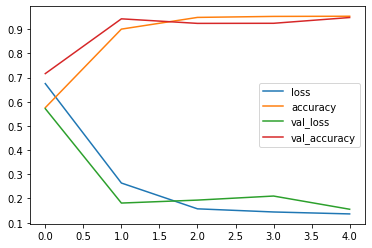

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
import numpy as np

In [ ]:
test_predictions = np.argmax(model.predict(test), axis=1)

In [ ]:
confusion_matrix(test.classes,test_predictions)

array([[1300,    0],
       [1300,    0]])

In [ ]:
print(classification_report(test.classes,test_predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1300
           1       0.00      0.00      0.00      1300

    accuracy                           0.50      2600
   macro avg       0.25      0.50      0.33      2600
weighted avg       0.25      0.50      0.33      2600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np

In [ ]:
img = tf.keras.preprocessing.image.load_img("cellimage/cell_images/test/uninfected/C100P61ThinF_IMG_20150918_144104_cell_34.png")
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(150,150))
img_28 = img_28/255.0
img_28=tf.expand_dims(img_28, axis=0)

In [ ]:
if tf.cast(tf.round(model.predict(img_28))[0][0],tf.int32).numpy()==1:
  print("uninfected")
else:
  print("parasitized")

uninfected
